In [6]:
# Import library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew

from scipy.stats import norm
from pylab import rcParams
%matplotlib inline

In [7]:
# Read data
rawData = pd.read_csv('../data/usedCarsFinal.csv')
rawData.tail()

,name,location,model_year,mileage,engine_type,transmission,registered_in,color,assembly,engine_capacity,body_type,other_features_list,url,price
75894,Honda City i-DSI 2006,"Peshawar Road, Rawalpindi Punjab",2006,"126,000 km",Petrol,Manual,Lahore,White,Local,1300 cc,Sedan,"AM/FM Radio,Air Conditioning,Cassette Player,P...",https://www.pakwheels.com/used-cars/honda-city...,1350000.0
75895,Hyundai Elantra GLS 2021,"Naval Housing Scheme, Karachi Sindh",2021,"16,500 km",Petrol,Automatic,Un-Registered,Black,Imported,2000 cc,Sedan,"ABS,AM/FM Radio,Air Bags,Air Conditioning,Allo...",https://www.pakwheels.com/used-cars/hyundai-el...,4600000.0
75896,Honda Civic Oriel Prosmatec UG 2013,"Beacon House Society, Lahore Punjab",2013,"123,000 km",Petrol,Automatic,Lahore,Black,Local,1800 cc,Sedan,"ABS,AM/FM Radio,Air Bags,Air Conditioning,Allo...",https://www.pakwheels.com/used-cars/honda-civi...,2300000.0
75897,Toyota Vitz F 1.0 2002,Swabi KPK,2002,"299,999 km",Petrol,Automatic,Islamabad,Silver,Imported,1000 cc,Hatchback,"ABS,AM/FM Radio,Air Bags,Air Conditioning,CD P...",https://www.pakwheels.com/used-cars/toyota-vit...,1380000.0
75898,Daihatsu Cuore CX Eco 2004,"DHA Defence, Karachi Sindh",2004,"150,000 km",Petrol,Manual,Sindh,Unlisted,Local,800 cc,Hatchback,"AM/FM Radio,Air Conditioning,Power Steering",https://www.pakwheels.com/used-cars/daihatsu-c...,550000.0


In [8]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75899 entries, 0 to 75898
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 75899 non-null  object 
 1   location             75899 non-null  object 
 2   model_year           75899 non-null  int64  
 3   mileage              75899 non-null  object 
 4   engine_type          75899 non-null  object 
 5   transmission         75899 non-null  object 
 6   registered_in        75899 non-null  object 
 7   color                75899 non-null  object 
 8   assembly             75899 non-null  object 
 9   engine_capacity      75899 non-null  object 
 10  body_type            67804 non-null  object 
 11  other_features_list  69353 non-null  object 
 12  url                  75899 non-null  object 
 13  price                74771 non-null  float64
dtypes: float64(1), int64(1), object(12)
memory usage: 8.1+ MB


In [9]:
# Null data
rawData.dropna(subset=['price'], inplace=True)
rawData.reset_index(drop=True, inplace=True)
rawData.head()

,name,location,model_year,mileage,engine_type,transmission,registered_in,color,assembly,engine_capacity,body_type,other_features_list,url,price
0,Toyota Premio X EX Package 1.8 2018,"Askari 6, Peshawar KPK",2018,"17,000 km",Petrol,Automatic,Un-Registered,Peral White,Imported,1800 cc,Sedan,"ABS,AM/FM Radio,Air Bags,Air Conditioning,Allo...",https://www.pakwheels.com/used-cars/toyota-pre...,8500000.0
1,Honda City Aspire 1.3 i-VTEC 2016,"I- 8, Islamabad Islamabad",2016,"59,000 km",Petrol,Manual,Islamabad,White,Local,1300 cc,Sedan,"ABS,AM/FM Radio,Air Conditioning,Alloy Rims,CD...",https://www.pakwheels.com/used-cars/honda-city...,2375000.0
2,Suzuki Bolan VX Euro II 2018,"Dhok Sayedan Road, Rawalpindi Punjab",2018,"55,000 km",Petrol,Manual,Islamabad,White,Local,800 cc,Van,"AM/FM Radio,Immobilizer Key",https://www.pakwheels.com/used-cars/suzuki-bol...,1050000.0
3,Suzuki Swift GLX CVT 2022,Karachi Sindh,2022,2 km,Petrol,Automatic,Sindh,Grey,Local,1200 cc,Hatchback,"ABS,AM/FM Radio,Air Bags,Air Conditioning,Allo...",https://www.pakwheels.com/used-cars/suzuki-swi...,3550000.0
4,Suzuki Alto 2017,"Bani Gala, Islamabad Islamabad",2017,"58,000 km",Petrol,Manual,Islamabad,Silver,Imported,660 cc,NaN,NaN,https://www.pakwheels.com/used-cars/suzuki-alt...,1950000.0


In [10]:
# Get manufacturer from name and drop name
manufacturer = rawData['name'].apply(lambda x : x.split(' ')[0]) 
rawData.insert(1, "manufacturer", manufacturer, allow_duplicates = True)
rawData.drop('name', axis=1, inplace=True)
rawData.tail()

,manufacturer,location,model_year,mileage,engine_type,transmission,registered_in,color,assembly,engine_capacity,body_type,other_features_list,url,price
74766,Honda,"Peshawar Road, Rawalpindi Punjab",2006,"126,000 km",Petrol,Manual,Lahore,White,Local,1300 cc,Sedan,"AM/FM Radio,Air Conditioning,Cassette Player,P...",https://www.pakwheels.com/used-cars/honda-city...,1350000.0
74767,Hyundai,"Naval Housing Scheme, Karachi Sindh",2021,"16,500 km",Petrol,Automatic,Un-Registered,Black,Imported,2000 cc,Sedan,"ABS,AM/FM Radio,Air Bags,Air Conditioning,Allo...",https://www.pakwheels.com/used-cars/hyundai-el...,4600000.0
74768,Honda,"Beacon House Society, Lahore Punjab",2013,"123,000 km",Petrol,Automatic,Lahore,Black,Local,1800 cc,Sedan,"ABS,AM/FM Radio,Air Bags,Air Conditioning,Allo...",https://www.pakwheels.com/used-cars/honda-civi...,2300000.0
74769,Toyota,Swabi KPK,2002,"299,999 km",Petrol,Automatic,Islamabad,Silver,Imported,1000 cc,Hatchback,"ABS,AM/FM Radio,Air Bags,Air Conditioning,CD P...",https://www.pakwheels.com/used-cars/toyota-vit...,1380000.0
74770,Daihatsu,"DHA Defence, Karachi Sindh",2004,"150,000 km",Petrol,Manual,Sindh,Unlisted,Local,800 cc,Hatchback,"AM/FM Radio,Air Conditioning,Power Steering",https://www.pakwheels.com/used-cars/daihatsu-c...,550000.0


In [11]:
# Convert model year to age
rawData['age'] = 2022 - rawData['model_year']
rawData.drop('model_year', axis=1, inplace=True)
rawData.tail()

,manufacturer,location,mileage,engine_type,transmission,registered_in,color,assembly,engine_capacity,body_type,other_features_list,url,price,age
74766,Honda,"Peshawar Road, Rawalpindi Punjab","126,000 km",Petrol,Manual,Lahore,White,Local,1300 cc,Sedan,"AM/FM Radio,Air Conditioning,Cassette Player,P...",https://www.pakwheels.com/used-cars/honda-city...,1350000.0,16
74767,Hyundai,"Naval Housing Scheme, Karachi Sindh","16,500 km",Petrol,Automatic,Un-Registered,Black,Imported,2000 cc,Sedan,"ABS,AM/FM Radio,Air Bags,Air Conditioning,Allo...",https://www.pakwheels.com/used-cars/hyundai-el...,4600000.0,1
74768,Honda,"Beacon House Society, Lahore Punjab","123,000 km",Petrol,Automatic,Lahore,Black,Local,1800 cc,Sedan,"ABS,AM/FM Radio,Air Bags,Air Conditioning,Allo...",https://www.pakwheels.com/used-cars/honda-civi...,2300000.0,9
74769,Toyota,Swabi KPK,"299,999 km",Petrol,Automatic,Islamabad,Silver,Imported,1000 cc,Hatchback,"ABS,AM/FM Radio,Air Bags,Air Conditioning,CD P...",https://www.pakwheels.com/used-cars/toyota-vit...,1380000.0,20
74770,Daihatsu,"DHA Defence, Karachi Sindh","150,000 km",Petrol,Manual,Sindh,Unlisted,Local,800 cc,Hatchback,"AM/FM Radio,Air Conditioning,Power Steering",https://www.pakwheels.com/used-cars/daihatsu-c...,550000.0,18


In [12]:
# Convert the mileage from str to int64
rawData['mileage'] = rawData['mileage'].str.replace("km", "")
rawData['mileage'] = rawData['mileage'].str.replace(",", "").astype(np.int64)
rawData.tail()

,manufacturer,location,mileage,engine_type,transmission,registered_in,color,assembly,engine_capacity,body_type,other_features_list,url,price,age
74766,Honda,"Peshawar Road, Rawalpindi Punjab",126000,Petrol,Manual,Lahore,White,Local,1300 cc,Sedan,"AM/FM Radio,Air Conditioning,Cassette Player,P...",https://www.pakwheels.com/used-cars/honda-city...,1350000.0,16
74767,Hyundai,"Naval Housing Scheme, Karachi Sindh",16500,Petrol,Automatic,Un-Registered,Black,Imported,2000 cc,Sedan,"ABS,AM/FM Radio,Air Bags,Air Conditioning,Allo...",https://www.pakwheels.com/used-cars/hyundai-el...,4600000.0,1
74768,Honda,"Beacon House Society, Lahore Punjab",123000,Petrol,Automatic,Lahore,Black,Local,1800 cc,Sedan,"ABS,AM/FM Radio,Air Bags,Air Conditioning,Allo...",https://www.pakwheels.com/used-cars/honda-civi...,2300000.0,9
74769,Toyota,Swabi KPK,299999,Petrol,Automatic,Islamabad,Silver,Imported,1000 cc,Hatchback,"ABS,AM/FM Radio,Air Bags,Air Conditioning,CD P...",https://www.pakwheels.com/used-cars/toyota-vit...,1380000.0,20
74770,Daihatsu,"DHA Defence, Karachi Sindh",150000,Petrol,Manual,Sindh,Unlisted,Local,800 cc,Hatchback,"AM/FM Radio,Air Conditioning,Power Steering",https://www.pakwheels.com/used-cars/daihatsu-c...,550000.0,18


In [13]:
constant_transform_kWh_hp = 0.7457
constant_transform_hp_cc = 16
rawData["engine_capacity"] = rawData["engine_capacity"].apply(lambda x: (float(x.split(" ")[0]) * constant_transform_hp_cc / constant_transform_kWh_hp) if x.split(" ")[1] != "cc" else x.split(" ")[0])
rawData["engine_capacity"] = rawData["engine_capacity"].astype(np.float64)
rawData.tail()

,manufacturer,location,mileage,engine_type,transmission,registered_in,color,assembly,engine_capacity,body_type,other_features_list,url,price,age
74766,Honda,"Peshawar Road, Rawalpindi Punjab",126000,Petrol,Manual,Lahore,White,Local,1300.0,Sedan,"AM/FM Radio,Air Conditioning,Cassette Player,P...",https://www.pakwheels.com/used-cars/honda-city...,1350000.0,16
74767,Hyundai,"Naval Housing Scheme, Karachi Sindh",16500,Petrol,Automatic,Un-Registered,Black,Imported,2000.0,Sedan,"ABS,AM/FM Radio,Air Bags,Air Conditioning,Allo...",https://www.pakwheels.com/used-cars/hyundai-el...,4600000.0,1
74768,Honda,"Beacon House Society, Lahore Punjab",123000,Petrol,Automatic,Lahore,Black,Local,1800.0,Sedan,"ABS,AM/FM Radio,Air Bags,Air Conditioning,Allo...",https://www.pakwheels.com/used-cars/honda-civi...,2300000.0,9
74769,Toyota,Swabi KPK,299999,Petrol,Automatic,Islamabad,Silver,Imported,1000.0,Hatchback,"ABS,AM/FM Radio,Air Bags,Air Conditioning,CD P...",https://www.pakwheels.com/used-cars/toyota-vit...,1380000.0,20
74770,Daihatsu,"DHA Defence, Karachi Sindh",150000,Petrol,Manual,Sindh,Unlisted,Local,800.0,Hatchback,"AM/FM Radio,Air Conditioning,Power Steering",https://www.pakwheels.com/used-cars/daihatsu-c...,550000.0,18


In [14]:
# One hot encoding with other features list
rawData['other_features_list'] = rawData['other_features_list'].str.split(",")

df = pd.Series(rawData['other_features_list'])
feature_dummies = pd.get_dummies(df.apply(pd.Series).stack(), prefix="feature").sum(level=0)
rawData = pd.concat([rawData, feature_dummies], axis=1)
rawData.drop('other_features_list', axis=1, inplace=True)
rawData.tail()

,manufacturer,location,mileage,engine_type,transmission,registered_in,color,assembly,engine_capacity,body_type,...,feature_Power Mirrors,feature_Power Steering,feature_Power Windows,feature_Rear AC Vents,feature_Rear Camera,feature_Rear Seat Entertainment,feature_Rear Speakers,feature_Steering Switches,feature_Sun Roof,feature_USB and Auxillary Cable
74766,Honda,"Peshawar Road, Rawalpindi Punjab",126000,Petrol,Manual,Lahore,White,Local,1300.0,Sedan,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74767,Hyundai,"Naval Housing Scheme, Karachi Sindh",16500,Petrol,Automatic,Un-Registered,Black,Imported,2000.0,Sedan,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
74768,Honda,"Beacon House Society, Lahore Punjab",123000,Petrol,Automatic,Lahore,Black,Local,1800.0,Sedan,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
74769,Toyota,Swabi KPK,299999,Petrol,Automatic,Islamabad,Silver,Imported,1000.0,Hatchback,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74770,Daihatsu,"DHA Defence, Karachi Sindh",150000,Petrol,Manual,Sindh,Unlisted,Local,800.0,Hatchback,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
rawData.drop('url', axis=1, inplace=True)
rawData.drop('location', axis=1, inplace=True)
rawData.tail()

,manufacturer,mileage,engine_type,transmission,registered_in,color,assembly,engine_capacity,body_type,price,...,feature_Power Mirrors,feature_Power Steering,feature_Power Windows,feature_Rear AC Vents,feature_Rear Camera,feature_Rear Seat Entertainment,feature_Rear Speakers,feature_Steering Switches,feature_Sun Roof,feature_USB and Auxillary Cable
74766,Honda,126000,Petrol,Manual,Lahore,White,Local,1300.0,Sedan,1350000.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74767,Hyundai,16500,Petrol,Automatic,Un-Registered,Black,Imported,2000.0,Sedan,4600000.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
74768,Honda,123000,Petrol,Automatic,Lahore,Black,Local,1800.0,Sedan,2300000.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
74769,Toyota,299999,Petrol,Automatic,Islamabad,Silver,Imported,1000.0,Hatchback,1380000.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74770,Daihatsu,150000,Petrol,Manual,Sindh,Unlisted,Local,800.0,Hatchback,550000.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
rawData["registered_in"] = rawData["registered_in"].apply(lambda x: "Registered" if x != "Un-Registered" else "Un-Registered")

In [17]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74771 entries, 0 to 74770
Data columns (total 39 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   manufacturer                     74771 non-null  object 
 1   mileage                          74771 non-null  int64  
 2   engine_type                      74771 non-null  object 
 3   transmission                     74771 non-null  object 
 4   registered_in                    74771 non-null  object 
 5   color                            74771 non-null  object 
 6   assembly                         74771 non-null  object 
 7   engine_capacity                  74771 non-null  float64
 8   body_type                        66746 non-null  object 
 9   price                            74771 non-null  float64
 10  age                              74771 non-null  int64  
 11  feature_ABS                      68268 non-null  float64
 12  feature_AM/FM Radi

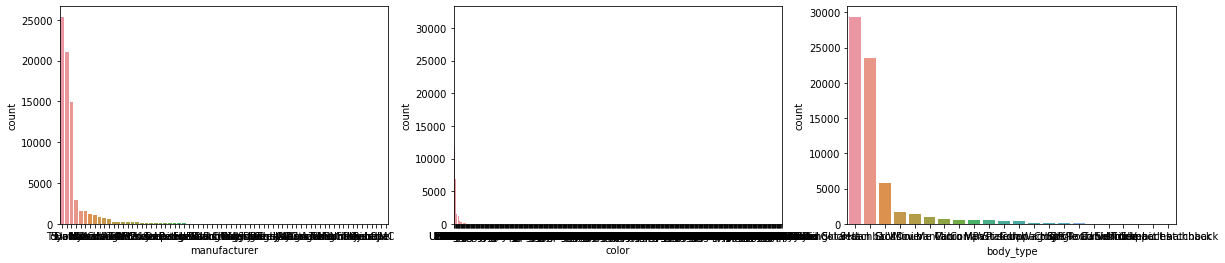

In [18]:
cat_cols = ['manufacturer', 'color', 'body_type']
i=0
while i < 3:
    fig = plt.figure(figsize=[20,4])
    plt.subplot(1,3,1)
    sns.countplot(x=cat_cols[i], data=rawData, order = rawData[cat_cols[i]].value_counts().index)
    i += 1
    plt.subplot(1,3,2)
    sns.countplot(x=cat_cols[i], data=rawData, order = rawData[cat_cols[i]].value_counts().index)
    i += 1
    plt.subplot(1,3,3)
    sns.countplot(x=cat_cols[i], data=rawData, order = rawData[cat_cols[i]].value_counts().index)
    i += 1
    plt.show()

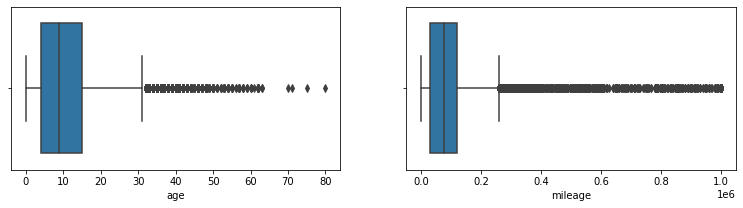

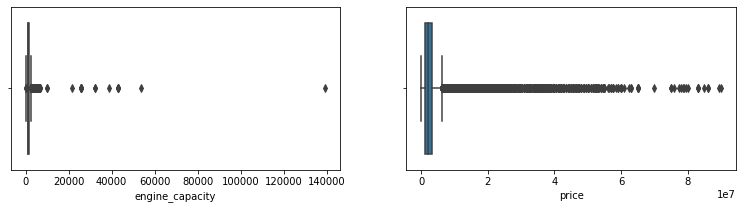

In [19]:
num_cols = ['age','mileage','engine_capacity','price']
i=0
while i < 4:
    fig = plt.figure(figsize=[13,3])
    plt.subplot(1,2,1)
    sns.boxplot(x=num_cols[i], data=rawData)
    i += 1
    plt.subplot(1,2,2)
    sns.boxplot(x=num_cols[i], data=rawData)
    i += 1
    plt.show()

/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level functio

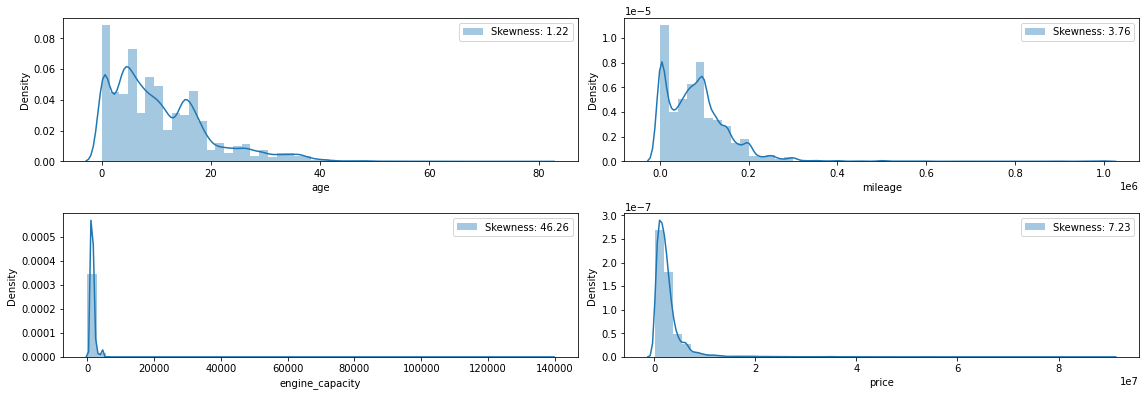

In [20]:
fig = plt.figure(figsize=(16,16))
for index, col in enumerate(['age', 'mileage', 'engine_capacity', 'price']):
    plt.subplot(6,2,index+1)
    t = sns.distplot(rawData.loc[:,col], label="Skewness: %.2f" %rawData.loc[:, col].skew())
    t.legend()
fig.tight_layout(pad=1.0);

In [21]:
rawData.drop(rawData[rawData['age'] > 40].index, inplace=True)
rawData.drop(rawData[rawData['mileage'] > 400000].index, inplace=True)
rawData.drop(rawData[rawData['engine_capacity'] > 5000].index, inplace=True)
rawData.drop(rawData[rawData['engine_capacity'] < 500].index, inplace=True)

/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level functio

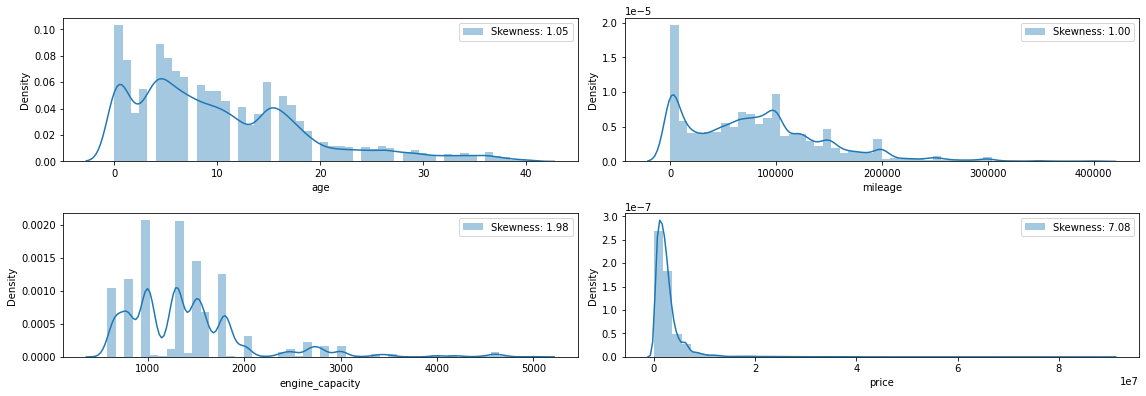

In [22]:
fig = plt.figure(figsize=(16,16))
for index, col in enumerate(['age', 'mileage', 'engine_capacity', 'price']):
    plt.subplot(6,2,index+1)
    t = sns.distplot(rawData.loc[:,col], label="Skewness: %.2f" %rawData.loc[:, col].skew())
    t.legend()
fig.tight_layout(pad=1.0);

In [23]:
numeric_feats = ['mileage', 'age', 'engine_capacity']

from scipy.special import boxcox1p
skewed_features = numeric_feats.index

rawData['price'] = np.log10(rawData['price'])
rawData['age'] = boxcox1p(rawData['age'], 0.35) + 1
rawData['mileage'] = boxcox1p(rawData['mileage'], 0.6) + 1
rawData['engine_capacity'] = boxcox1p(rawData['engine_capacity'], -0.3) + 1

/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level functio

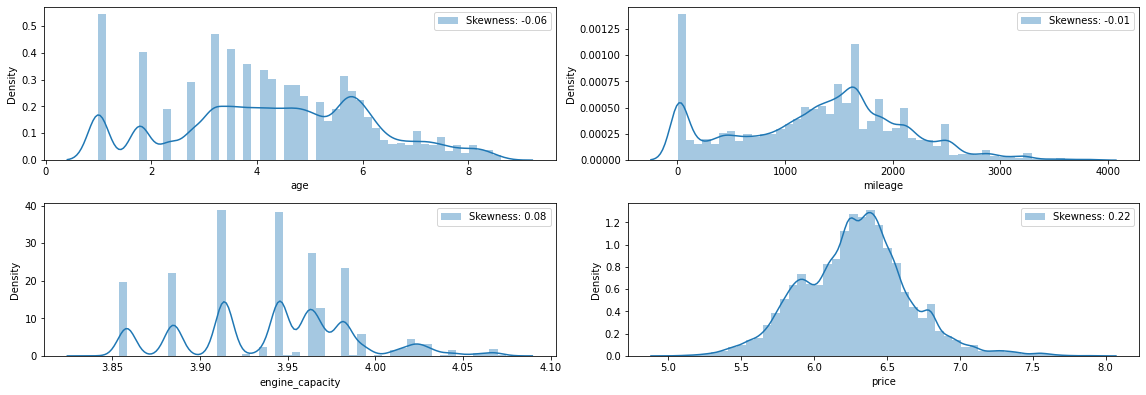

In [24]:
fig = plt.figure(figsize=(16,16))
for index, col in enumerate(['age', 'mileage', 'engine_capacity', 'price']):
    plt.subplot(6,2,index+1)
    t = sns.distplot(rawData.loc[:,col], label="Skewness: %.2f" %rawData.loc[:, col].skew())
    t.legend()
fig.tight_layout(pad=1.0);

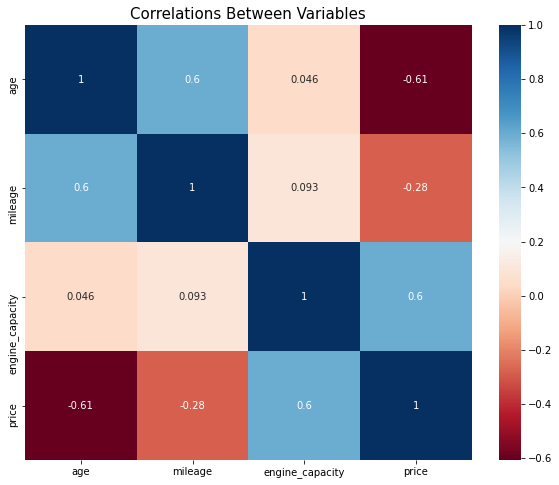

In [25]:
plt.figure(figsize=(10,8))
sns.heatmap(rawData[['age', 'mileage', 'engine_capacity', 'price']].corr(), annot=True, cmap="RdBu")
plt.title("Correlations Between Variables", size=15)
plt.show()